In [2]:
import pandas as pd

# Data Staging: 
## Extract, Transform and Load (ETL)

## Conceptual model:

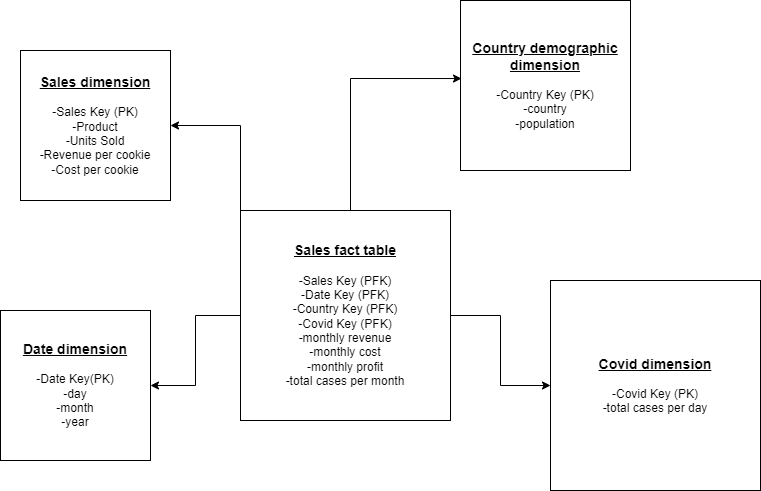

# Extract

In [3]:
df= pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Changing "Residence_type" column name to "residence_type" to ensure uniformity with the data.

In [11]:
df = df.rename({'Residence_type' : 'residence_type'},axis = 'columns')

In [12]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Finding null values in each column

In [29]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Dropping missing BMI values 

In [ ]:
df.dropna()

## Start Binning Data 

# Making sample data before transforming entire dataset

In [76]:
sample_df = df.sample(25)

Starting with binning age group

In [78]:
sample_df['age_group'] = 0 

In [93]:
sample_df['age_group'] = pd.cut(sample_df['age'],bins=sample_age_bins, labels= ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'] )

In [97]:
sample_df['age_group'] = pd.cut(sample_df['age'], bins=[0,10,20,30,40,50,60,70,80,90,100], right=False, labels= ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'])

Binning BMI, have not accounted for Null values yet.

In [100]:
sample_df['bmi_category'] = 0 

In [102]:
sample_df['bmi_category'] = pd.cut(sample_df['bmi'],bins=[0,18.5,25,30,40,100], right=False, labels= ['Underweight','Normal weight', 'Obese class I', 'Obese class II', 'Morbidly obese'])

Binning glucose

In [105]:
sample_df['glucose_range'] = pd.cut(sample_df['avg_glucose_level'],bins=[0,200,500], right=False, labels= ['Non-diabetic','Diabetic'])

In [112]:
sample_df = sample_df.drop('bmi_level', axis='columns')

In [113]:
sample_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_category,glucose_range
2532,20112,Male,79.0,0,1,Yes,Private,Urban,213.38,NaN,Unknown,0,70-79,NaN,Diabetic
5066,40112,Female,37.0,0,0,No,Private,Urban,118.41,25.1,never smoked,0,30-39,Obese class I,Non-diabetic
3775,4707,Female,63.0,0,0,Yes,Private,Urban,83.74,21.4,Unknown,0,60-69,Normal weight,Non-diabetic
3953,22352,Female,39.0,0,0,Yes,Self-employed,Urban,87.79,40.0,formerly smoked,0,30-39,Morbidly obese,Non-diabetic
401,49465,Female,13.0,0,0,No,children,Urban,70.16,21.2,never smoked,0,10-19,Normal weight,Non-diabetic
1699,37451,Female,47.0,0,0,Yes,Govt_job,Rural,108.56,27.3,formerly smoked,0,40-49,Obese class I,Non-diabetic
1621,4542,Female,53.0,0,0,Yes,Govt_job,Urban,83.79,44.0,Unknown,0,50-59,Morbidly obese,Non-diabetic
4552,71777,Male,74.0,1,1,Yes,Private,Rural,77.16,26.3,never smoked,0,70-79,Obese class I,Non-diabetic
931,54620,Male,40.0,0,0,Yes,Private,Urban,78.11,35.3,never smoked,0,40-49,Obese class II,Non-diabetic
1565,61924,Male,8.0,0,0,No,children,Rural,133.63,18.8,Unknown,0,0-9,Normal weight,Non-diabetic
